# Imporation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

# Dataset

In [ ]:
wealth_people = pd.read_csv("/content/drive/MyDrive/Skills/Python/Data mining/Decision Tree/End of year project 2024/Top_1000_wealthiest_people.csv")

In [ ]:
wealth_people.head(n=10)

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart
5,Sergey Brin,USA,Technology,93.19,Walmart
6,Michael Bloomberg,USA,Cosmetics,117.96,Reliance Industries
7,Warren Buffett,France,Retail,36.62,Microsoft
8,Carlos Slim,USA,Technology,97.35,Reliance Industries
9,Larry Page,USA,Technology,88.05,Walmart


# Analyse Data

In [ ]:
wealth_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1000 non-null   object 
 1   Country                  1000 non-null   object 
 2   Industry                 1000 non-null   object 
 3   Net Worth (in billions)  1000 non-null   float64
 4   Company                  1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


<Axes: xlabel='Industry', ylabel='count'>

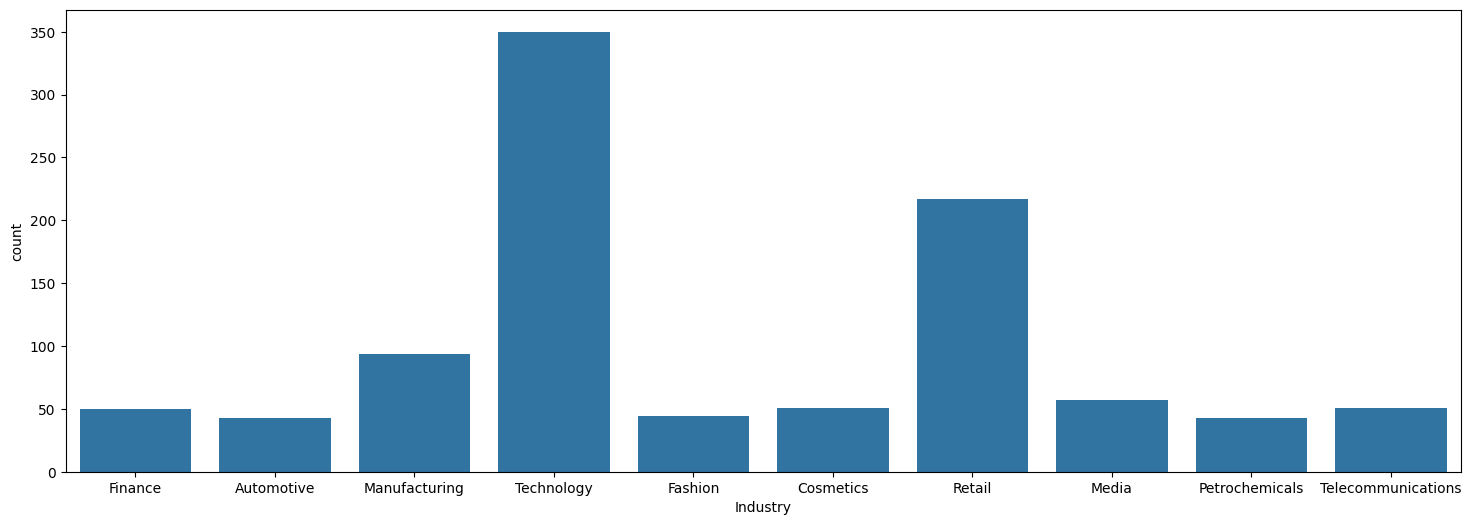

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x="Industry", data=wealth_people)

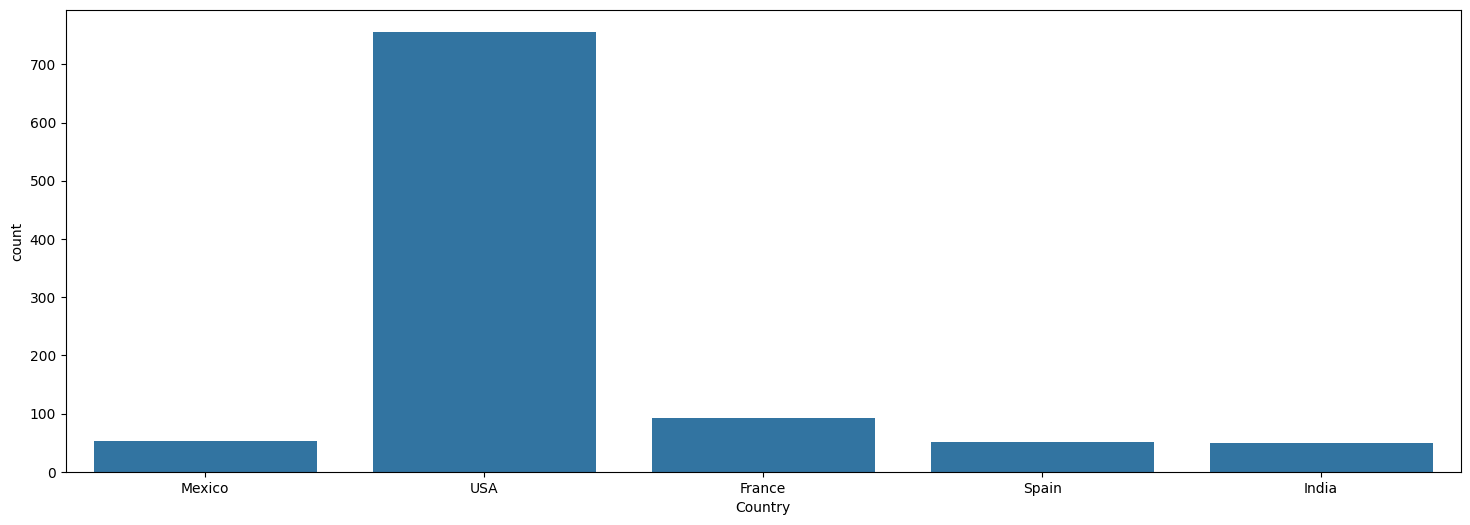

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x="Country", data=wealth_people)
plt.show()

# Preparing data for train and test

In [ ]:
wealth_people.columns

Index(['Name', 'Country', 'Industry', 'Net Worth (in billions)', 'Company'], dtype='object')

In [ ]:
X = wealth_people[["Industry", "Company"]]
y = wealth_people[['Net Worth (in billions)']] # prediction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

# Import Decision Tree from scikit learn.

In [ ]:
from sklearn.pipeline import Pipeline # utilise pour le pretraitement des donnees
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), ["Industry", "Company"])
        ])),
    ('regressor', DecisionTreeRegressor(random_state=101))
])

# here handle_unknown = 'ignore' means we ignore the labels not present on train but present on test

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Industry', 'Company'])])),
                ('regressor', DecisionTreeRegressor(random_state=101))])

In [ ]:
# Accès au modèle d'arbre de décision à partir du pipeline
tree_model = pipeline.named_steps['regressor']

# Afficher la profondeur de l'arbre
print(tree_model.get_depth())

23


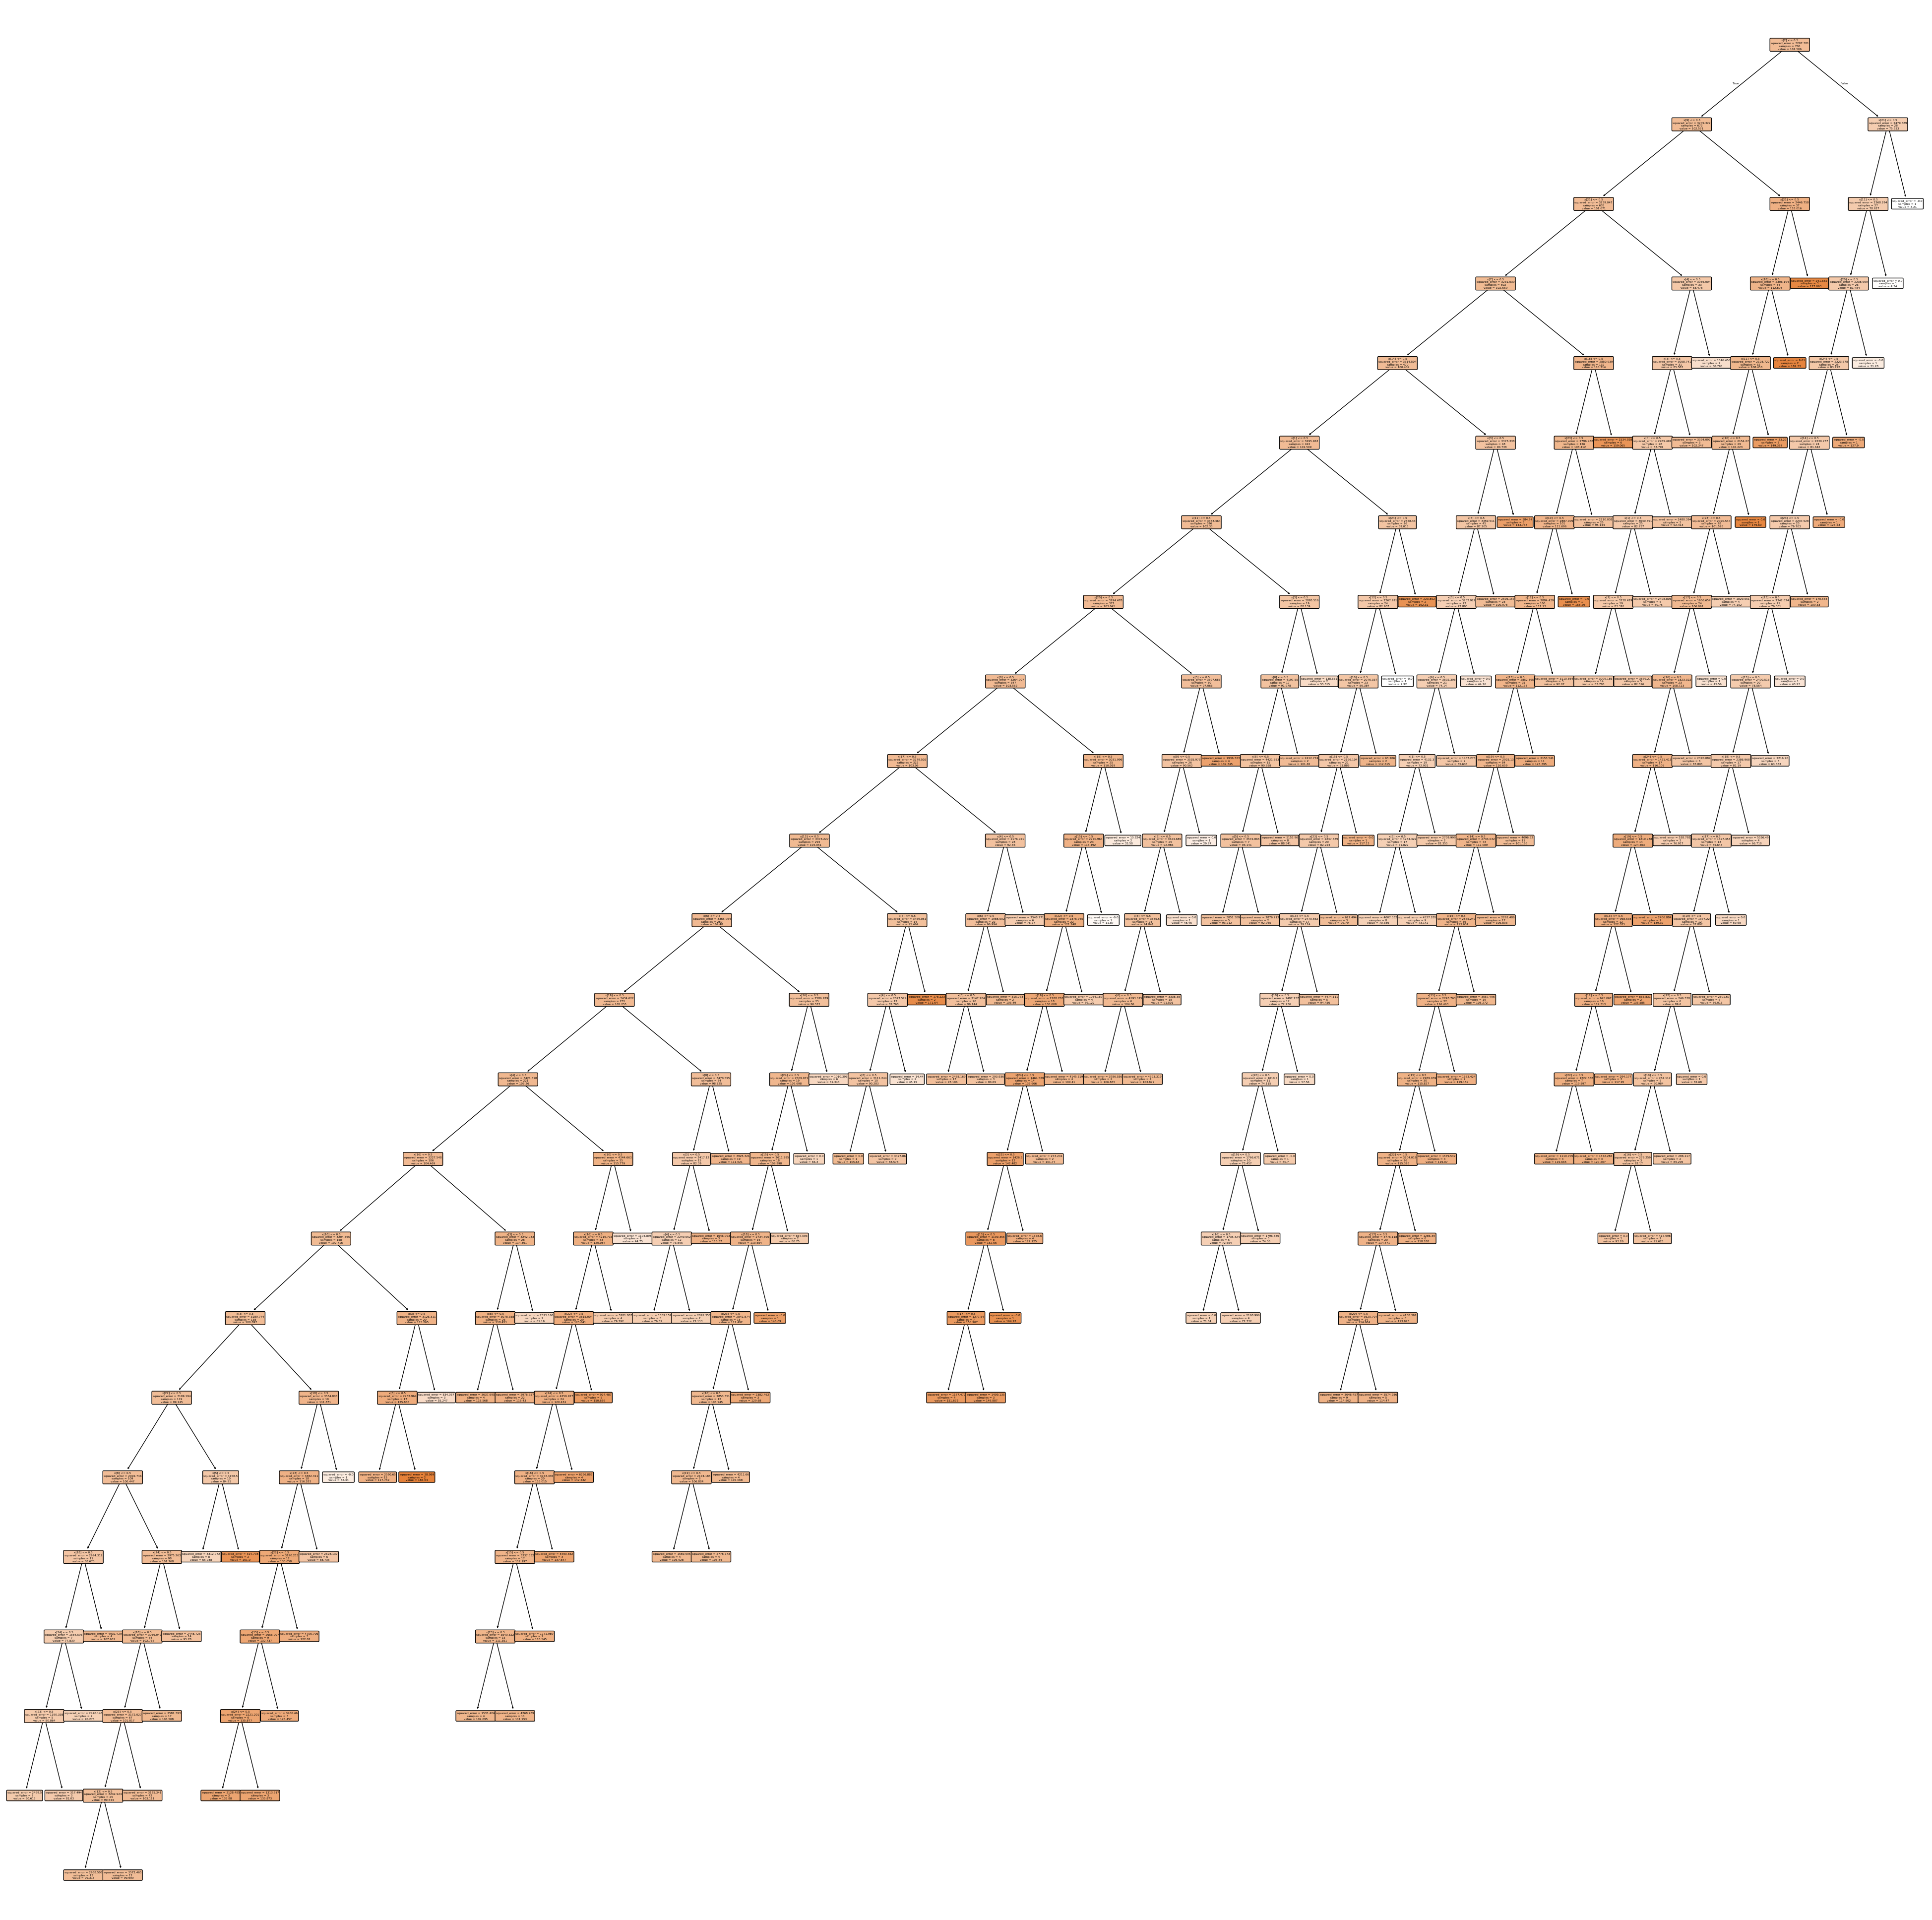

In [ ]:
plt.figure(figsize=(50, 50))
tree.plot_tree(tree_model, filled=True, rounded=True)
plt.show()

In [ ]:
y_pred = pipeline.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Mean Squared Error: 3793.149730619186
Root Mean Squared Error: 61.58855194449035


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 52.71391445356444


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")  # variate 0 to 1

R² Score: -0.16769443787514815


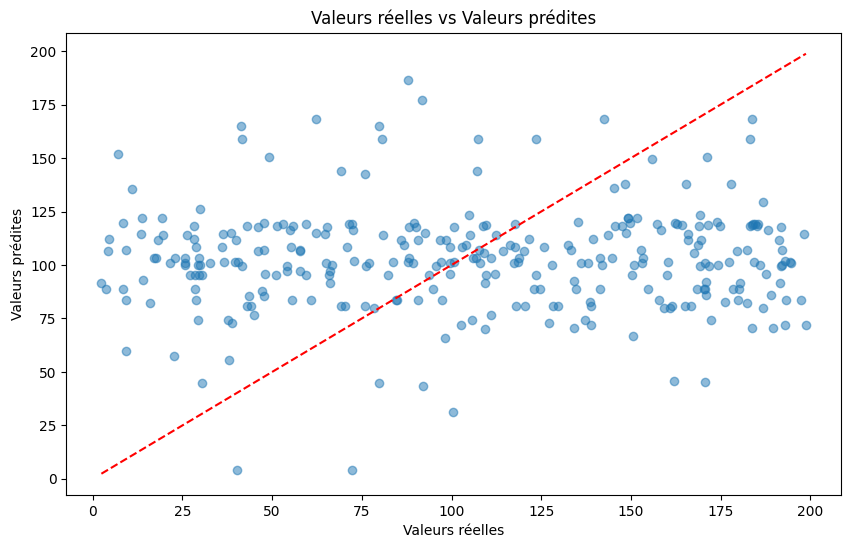

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne de référence (prédiction parfaite)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs Valeurs prédites')
plt.show()


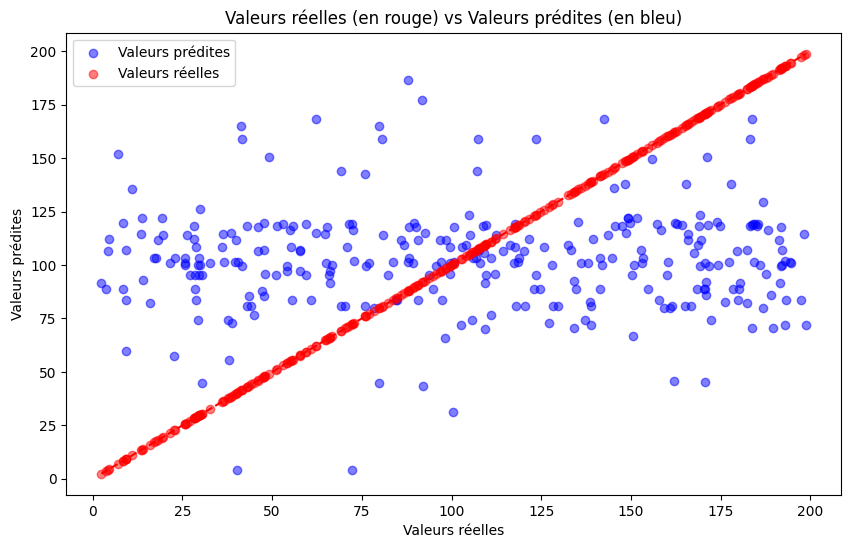

In [ ]:
plt.figure(figsize=(10, 6))

# Tracer les valeurs réelles en rouge (axe x) et les valeurs prédites en bleu (axe y)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Valeurs prédites")
plt.scatter(y_test, y_test, color='red', alpha=0.5, label="Valeurs réelles")

# Tracer la ligne de référence (prédiction parfaite) en rouge
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Ajouter des étiquettes et un titre
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles (en rouge) vs Valeurs prédites (en bleu)')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()
